In [20]:
import numpy as np 
import pandas as pd 
import os


In [21]:
dataset_path = 'Violence_Dataset'

violence_data = os.path.join(dataset_path, 'Violence')
non_violence_data = os.path.join(dataset_path, 'Non_violence')  

print(f"'Violence Data' count: {len(os.listdir(violence_data))}")
print(f"'Non Violence Data' count: {len(os.listdir(non_violence_data))}")

'Violence Data' count: 5832
'Non Violence Data' count: 5231


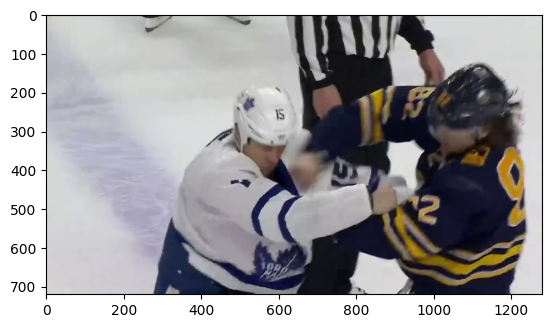

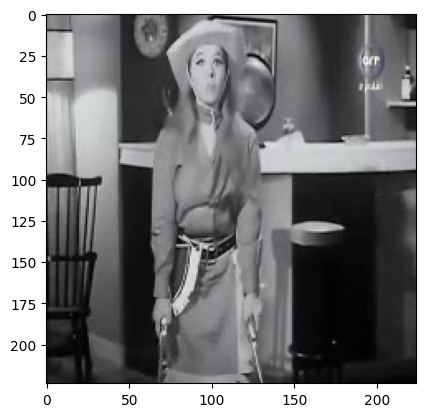

In [22]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Vimages =[files for files in os.listdir(violence_data)]
random_images = random.sample(Vimages, 2)
plt.imshow(mpimg.imread(os.path.join(violence_data, random_images[0])))
plt.show()

NVimages =[files for files in os.listdir(non_violence_data)]
random_images = random.sample(NVimages, 2)
plt.imshow(mpimg.imread(os.path.join(non_violence_data, random_images[0])))
plt.show()




In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from keras.models import Sequential, Model, load_model
from keras.layers import  Dropout, Dense, Flatten, Input
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import matplotlib.pyplot as plt
%matplotlib inline


import shutil
from sklearn.model_selection import train_test_split

In [24]:
# Create directories for the split
output_dir = '/content/split_dataset'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create subdirectories
os.makedirs(os.path.join(train_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'Non Violence'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'Non Violence'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Violence'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'Non Violence'), exist_ok=True)

# Load file names
violence_files = os.listdir(violence_data)
non_violence_files = os.listdir(non_violence_data)

# Split the data
def split_data(files, source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15):
    train_files, temp_files = train_test_split(files, train_size=train_ratio, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=(1 - val_ratio / (1 - train_ratio)), random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), train_dir)
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), val_dir)
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), test_dir)

# Split and copy files
split_data(violence_files, violence_data,
           os.path.join(train_dir, 'Violence'),
           os.path.join(val_dir, 'Violence'),
           os.path.join(test_dir, 'Violence'))

split_data(non_violence_files, non_violence_data,
           os.path.join(train_dir, 'Non Violence'),
           os.path.join(val_dir, 'Non Violence'),
           os.path.join(test_dir, 'Non Violence'))

print("Data splitting completed successfully :)")

Data splitting completed successfully :)


In [25]:
# List contents of the directories
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(val_dir))
print("Test directory contents:", os.listdir(test_dir))

Train directory contents: ['Non Violence', 'Violence']
Validation directory contents: ['Non Violence', 'Violence']
Test directory contents: ['Non Violence', 'Violence']


In [26]:
print("Train - Violence contents:", os.listdir(os.path.join(train_dir, 'Violence')))
print("Train - Non Violence contents:", os.listdir(os.path.join(train_dir, 'Non Violence')))

Train - Violence contents: ['V_1.mp4_frame0.jpg', 'V_1.mp4_frame1.jpg', 'V_1.mp4_frame2.jpg', 'V_1.mp4_frame3.jpg', 'V_1.mp4_frame4.jpg', 'V_1.mp4_frame5.jpg', 'V_1.mp4_frame6.jpg', 'V_10.mp4_frame0.jpg', 'V_10.mp4_frame2.jpg', 'V_10.mp4_frame3.jpg', 'V_10.mp4_frame4.jpg', 'V_100.mp4_frame0.jpg', 'V_100.mp4_frame3.jpg', 'V_100.mp4_frame5.jpg', 'V_1000.mp4_frame1.jpg', 'V_1000.mp4_frame2.jpg', 'V_1000.mp4_frame3.jpg', 'V_101.mp4_frame0.jpg', 'V_101.mp4_frame1.jpg', 'V_101.mp4_frame3.jpg', 'V_102.mp4_frame0.jpg', 'V_102.mp4_frame3.jpg', 'V_102.mp4_frame4.jpg', 'V_103.mp4_frame0.jpg', 'V_103.mp4_frame1.jpg', 'V_103.mp4_frame2.jpg', 'V_103.mp4_frame4.jpg', 'V_103.mp4_frame5.jpg', 'V_104.mp4_frame0.jpg', 'V_104.mp4_frame1.jpg', 'V_104.mp4_frame2.jpg', 'V_105.mp4_frame0.jpg', 'V_105.mp4_frame2.jpg', 'V_105.mp4_frame3.jpg', 'V_105.mp4_frame4.jpg', 'V_106.mp4_frame0.jpg', 'V_106.mp4_frame1.jpg', 'V_106.mp4_frame2.jpg', 'V_106.mp4_frame3.jpg', 'V_106.mp4_frame4.jpg', 'V_106.mp4_frame5.jpg', 'V_

In [27]:
# Define paths to the directories containing the checkpoints
checkpoint_dirs = [
    os.path.join(train_dir, '.ipynb_checkpoints'),
    os.path.join(val_dir, '.ipynb_checkpoints'),
    os.path.join(test_dir, '.ipynb_checkpoints')
]

# Remove checkpoint directories if they exist
for dir_path in checkpoint_dirs:
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)

# Verify that checkpoint directories are removed
print("Train directory contents:", os.listdir(train_dir))
print("Validation directory contents:", os.listdir(val_dir))
print("Test directory contents:", os.listdir(test_dir))

Train directory contents: ['Non Violence', 'Violence']
Validation directory contents: ['Non Violence', 'Violence']
Test directory contents: ['Non Violence', 'Violence']


In [28]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load and preprocess validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print("Data Preprocessing aka Rescaling  completed!")

Found 7743 images belonging to 2 classes.
Found 1658 images belonging to 2 classes.
Found 1662 images belonging to 2 classes.
Data Preprocessing aka Rescaling  completed!


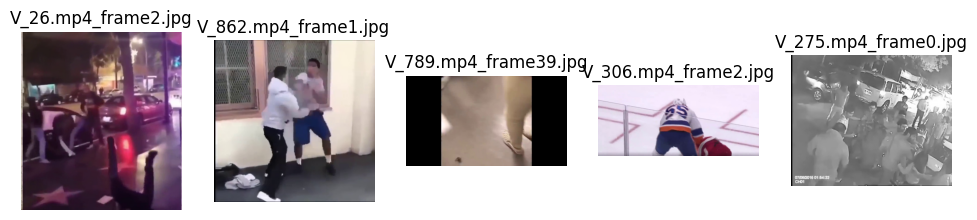

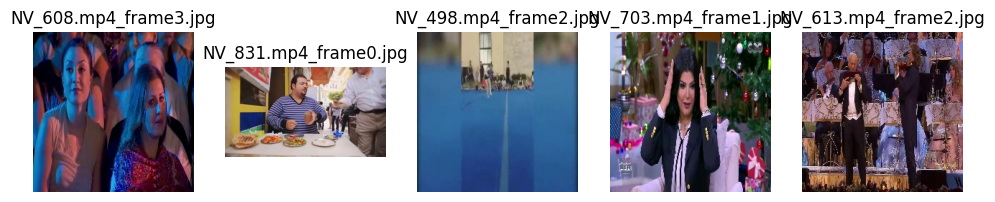

In [29]:
def plot_images_from_directory(directory, num_images=5):
    # Get a list of image files
    image_files = [f for f in os.listdir(directory) if f.endswith(('png', 'jpg', 'jpeg'))]

    # Select a few images to display
    selected_files = np.random.choice(image_files, num_images, replace=False)

    # Plot images
    plt.figure(figsize=(12, 8))

    for i, img_file in enumerate(selected_files):
        img_path = os.path.join(directory, img_file)
        img = mpimg.imread(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(img_file)

    plt.show()

# Example usage
plot_images_from_directory(os.path.join(train_dir, 'Violence'))
plot_images_from_directory(os.path.join(train_dir, 'Non Violence'))

In [50]:
"""from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model


base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)

x = Dropout(0.5)(x)

predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
"""
""" 
from keras.applications import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load InceptionV3 as a replacement for GoogleNet (GoogleNet V1 equivalent)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
"""
""" 
from keras.applications import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load DenseNet121 as the base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the DenseNet base
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (Violent/Non-Violent)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers to only train the custom classification head
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
"""
 
from keras.applications import EfficientNetB0
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load EfficientNetB0 as the base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of EfficientNet base
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification (Violent/Non-Violent)

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers to only train the custom classification head
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_4[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

In [52]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
    )

Epoch 1/5
241/241 [==============================] - 191s 780ms/step - loss: 0.7020 - accuracy: 0.5121 - val_loss: 0.6998 - val_accuracy: 0.5270
Epoch 2/5
241/241 [==============================] - 181s 751ms/step - loss: 0.6990 - accuracy: 0.5041 - val_loss: 0.6951 - val_accuracy: 0.4737
Epoch 3/5
241/241 [==============================] - 183s 759ms/step - loss: 0.6958 - accuracy: 0.5049 - val_loss: 0.6940 - val_accuracy: 0.4724
Epoch 4/5
241/241 [==============================] - 186s 770ms/step - loss: 0.6959 - accuracy: 0.5185 - val_loss: 0.6921 - val_accuracy: 0.5294
Epoch 5/5
241/241 [==============================] - 189s 784ms/step - loss: 0.6933 - accuracy: 0.5185 - val_loss: 0.6927 - val_accuracy: 0.5276


In [53]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test Accuracy: {test_acc:.5f}")


51/51 [==============================] - 30s 595ms/step - loss: 0.6927 - accuracy: 0.5276
Test Accuracy: 0.52757


In [54]:
from keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  
    return img_array


img_path = 'image.png'
preprocessed_img = load_and_preprocess_image(img_path)


In [55]:
# Predict the class of the custom image
prediction = model.predict(preprocessed_img)
class_label = 'Violent' if prediction > 0.5 else 'Non-Violent'
print(f"The image is classified as: {class_label}")


1/1 [==============================] - 1s 1s/step
The image is classified as: Violent


In [56]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    conv_outputs = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.reduce_mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

def display_gradcam(image_path, heatmap, alpha=0.4):
    img = cv2.imread(image_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    superimposed_img = np.uint8(heatmap * alpha + img)
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(superimposed_img_rgb)
    plt.axis('off')
    plt.show()



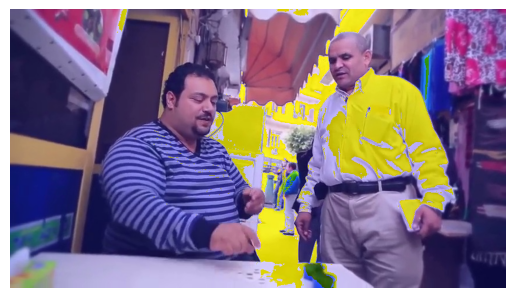

In [58]:
# Apply Grad-CAM if the image is classified as violent
if class_label == 'Violent':
    heatmap = get_gradcam_heatmap(model, preprocessed_img, last_conv_layer_name='top_conv')
    display_gradcam(img_path, heatmap)

1/1 [==============================] - 0s 70ms/step
The image is classified as: Violent


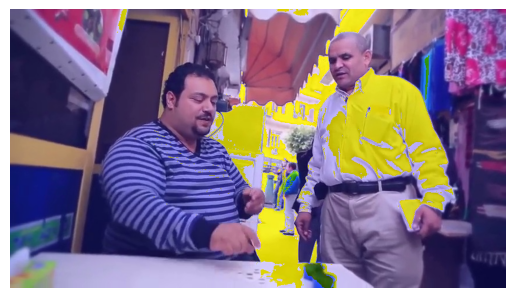

In [59]:
img_path = 'image.png'
preprocessed_img = load_and_preprocess_image(img_path)

# Predict the class of the custom image
prediction = model.predict(preprocessed_img)
class_label = 'Violent' if prediction > 0.5 else 'Non-Violent'
print(f"The image is classified as: {class_label}")
heatmap = get_gradcam_heatmap(model, preprocessed_img, last_conv_layer_name='top_conv')
display_gradcam(img_path, heatmap)